Librerias a utilizar

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
import math
import xgboost as xgb


Carga de datasets

In [ ]:
df1 = pd.read_excel(r"C:\Users\juli_\Desktop\Henry\Datathon\Datathon-main\Datathon-main\bike_train.xlsx")
df2 = pd.read_excel(r"C:\Users\juli_\Desktop\Henry\Datathon\Datathon-main\Datathon-main\bike_test.xlsx")
bikes = df1.copy()
bikes2 = df2.copy()

NameError: name 'pd' is not defined

Analisis exploratorio de datos

In [46]:
df1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [48]:
df1.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


In [1]:
df1.info()

NameError: name 'df1' is not defined

In [ ]:
df1.isna().sum()

In [3]:
bikes = bikes.drop(["instant","dteday","registered","casual"],axis =1)

In [65]:
bikes.corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.446665,0.865268,-0.007610,-0.008928,-0.003688,0.012630,-0.009029,0.410790,0.413196,0.198937,-0.142924,0.119043,0.093595,0.111369
yr,-0.446665,1.000000,-0.488103,-0.003948,0.001039,-0.002714,0.001068,-0.006309,-0.198929,-0.190360,-0.141319,0.067356,0.053371,0.171910,0.156960
mnth,0.865268,-0.488103,1.000000,-0.007060,0.009372,0.014500,0.006441,-0.012239,0.353330,0.358541,0.201669,-0.147042,0.078563,0.061686,0.073431
hr,-0.007610,-0.003948,-0.007060,1.000000,0.000414,-0.004037,0.003454,-0.024003,0.139251,0.134633,-0.257202,0.130441,0.285182,0.381933,0.396698
holiday,-0.008928,0.001039,0.009372,0.000414,1.000000,-0.102503,-0.248601,-0.014707,-0.028519,-0.038005,-0.036672,0.022681,0.022140,-0.044534,-0.030304
weekday,-0.003688,-0.002714,0.014500,-0.004037,-0.102503,1.000000,0.031057,0.017259,-0.010002,-0.009841,-0.025932,0.008447,0.023687,0.019179,0.022618
workingday,0.012630,0.001068,0.006441,0.003454,-0.248601,0.031057,1.000000,0.042202,0.062273,0.066305,0.022805,-0.002493,-0.298241,0.134789,0.025132
weathersit,-0.009029,-0.006309,-0.012239,-0.024003,-0.014707,0.017259,0.042202,1.000000,-0.080149,-0.081386,0.430378,0.009195,-0.147903,-0.130223,-0.149848
temp,0.410790,-0.198929,0.353330,0.139251,-0.028519,-0.010002,0.062273,-0.080149,1.000000,0.991785,-0.019289,-0.013984,0.450777,0.322875,0.395743
atemp,0.413196,-0.190360,0.358541,0.134633,-0.038005,-0.009841,0.066305,-0.081386,0.991785,1.000000,-0.003669,-0.057619,0.447899,0.323264,0.395234


Primer proceso de Machine Learning para ver la importancia de las variables

In [4]:
X_train = bikes.drop(["cnt"],axis=1)
y_train = bikes['cnt']
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Graficamos importancia

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

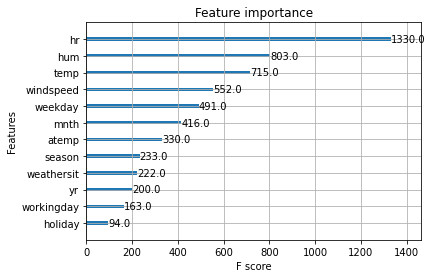

In [5]:
xgb.plot_importance(model, ax=plt.gca())

Podemos ver que las variables hr, hum, temp, windspeed, weekday y mnth son las que el algoritmo selecciona como mas importantes

Proceso de Machine Learning

In [6]:
X = bikes.drop(["cnt"],axis=1)
y = bikes['cnt']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30,random_state=42)
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_test_pred = xgb.predict(X_test)
print('Error en datos de train:', xgb.score(X_train, y_train))
print('Error en datos de test:', xgb.score(X_test, y_test))
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_test_pred,squared=False))
print("RMSE:", RMSE)


Error en datos de train: 0.9805758278644431
Error en datos de test: 0.9388066885987091
RMSE: 6.084607196404872


Se optimizan algunos hipermarametros

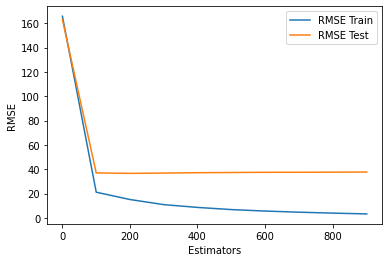

In [15]:
#Numero de arboles
rmse_train = []
rmse_test = []
estimators = np.arange(1,1000,100)
for n_estimators in estimators:
    xgb = XGBRegressor(n_estimators=n_estimators)
    xgb.fit(X_train, y_train)
    
    y_pred_train = xgb.predict(X_train)
    y_pred_test = xgb.predict(X_test)
    
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

scores_train = np.array(rmse_train)
scores_test = np.array(rmse_test)
plt.plot(estimators,rmse_train, label = 'RMSE Train')
plt.plot(estimators,rmse_test, label = 'RMSE Test')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Estimators')
plt.show()

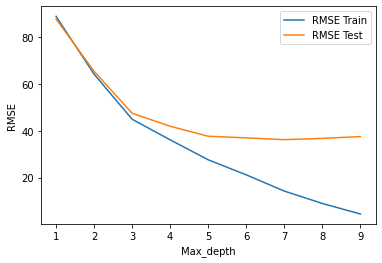

In [16]:
#Profundidad
rmse_train = []
rmse_test = []
profundidades = np.arange(1,10)
for max_depth in profundidades:
    xgb = XGBRegressor(max_depth=max_depth)
    xgb.fit(X_train, y_train)
    
    y_pred_train = xgb.predict(X_train)
    y_pred_test = xgb.predict(X_test)
    
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

scores_train = np.array(rmse_train)
scores_test = np.array(rmse_test)
plt.plot(profundidades,rmse_train, label = 'RMSE Train')
plt.plot(profundidades,rmse_test, label = 'RMSE Test')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Max_depth')
plt.show()

In [32]:
grid_values = {'learning_rate': [0.001, 0.01, 0.1],
               'n_estimators':np.arange(300,600,50),
               'max_depth': [5,6,7,8,9]}
grid_xgb = GridSearchCV(XGBRegressor(objective = 'reg:squarederror', eval_metric="rmse",random_state=42), param_grid = grid_values,)
grid_xgb.fit(X_train, y_train)
print(grid_xgb.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)


In [35]:
#Estadisticas anteriories
#Error en datos de train: 0.9805758278644431
#Error en datos de test: 0.9388066885987091
#RMSE: 6.084607196404872
xgb = XGBRegressor(n_estimators=400, max_depth=7, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_test_pred = xgb.predict(X_test)
print('Error en datos de train:', xgb.score(X_train, y_train))
print('Error en datos de test:', xgb.score(X_test, y_test))
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_test_pred,squared=False))
print("RMSE:", RMSE)

Error en datos de train: 0.9936498213888981
Error en datos de test: 0.9446089931692099
RMSE: 5.934940547011835


Predicción y conversión a csv

In [36]:
X_test = bikes2.drop(["instant","dteday"], axis=1)
y_pred = xgb.predict(X_test)


In [45]:
df_fin = pd.DataFrame(y_pred, columns={"pred"})
df_fin.to_csv(r"C:\Users\juli_\Desktop\Henry\Datathon\julimedi.csv",index=False)